# Mapping Australian Offshore Oil & Gas Resources with Basemap

In [1]:
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
rcParams['figure.figsize'] = (12,8)

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# Zooming to Australia

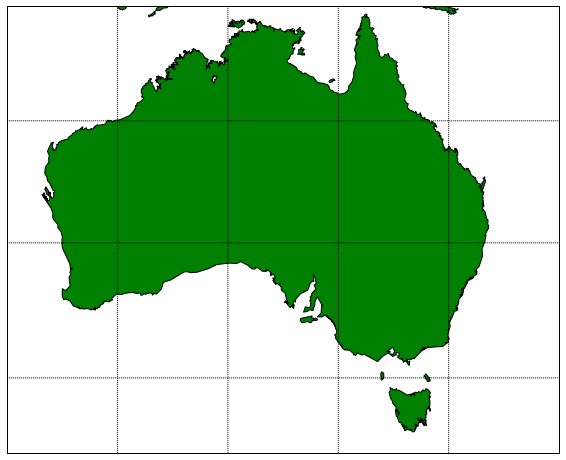

In [3]:
australia_map = Basemap(projection='merc', lat_0=-33.8650, lon_0=151.2,
    resolution = 'l', area_thresh = 1000.0,
    llcrnrlon=110.0, llcrnrlat=-45.0,
    urcrnrlon=160.0, urcrnrlat=-10.0)
 
australia_map.drawcoastlines()
australia_map.drawcountries()
australia_map.fillcontinents(color='green')
australia_map.drawmapboundary()
 
australia_map.drawmeridians(np.arange(0, 360, 10))
australia_map.drawparallels(np.arange(-90, 90, 10))
 
plt.show()

# Australian Oil & Gas dataset

In [5]:
import csv

# Open the MRDS csv file
csvfile = open( "/workspace/dataset/OilGas.csv", "rb" )

# Read csv file according to dialect
reader = csv.reader( csvfile )

# Read header
header = reader.next()
print header

# Close input file
csvfile.close()

['GAID', 'PlatformName', 'OtherName', 'Owner', 'Operator', 'PlatformType', 'LocationName', 'State', 'Latitude', 'Longitude', 'SpatialConfidence', 'Photo', 'Source', 'SourceDate', 'Comments']


In [7]:
# Open the MRDS data file.
filename = '/workspace/dataset/OilGas.csv'

# Create empty lists for the latitudes and longitudes.
lats, lons = [], []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[8]))
        lons.append(float(row[9]))
        
# Display the first 5 lats and lons.
print('lats', lats[0:5])
print('lons', lons[0:5])

('lats', [-29.46645833, -20.05869444, -21.40344167, -20.024125, -20.289975])
('lons', [114.8683417, 115.1919639, 114.0881528, 116.3096944, 116.275275])


# Plotting Offshore Oil & Gas resources 

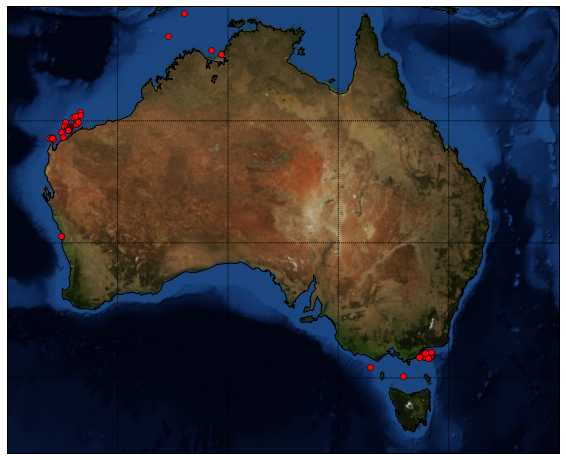

In [8]:
australia_map = Basemap(projection='merc', lat_0=-33.8650, lon_0=151.2,
    resolution = 'l', area_thresh = 1000.0,
    llcrnrlon=110.0, llcrnrlat=-45.0,
    urcrnrlon=160.0, urcrnrlat=-10.0)
 
australia_map.drawcoastlines()
australia_map.drawcountries()
australia_map.bluemarble()
australia_map.drawmapboundary()
 
australia_map.drawmeridians(np.arange(0, 360, 10))
australia_map.drawparallels(np.arange(-90, 90, 10))
 
x,y = australia_map(lons, lats)
australia_map.plot(x, y, 'ro', markersize=6)
title_string = 'Australian Oil&Gas resources from GA database'
 
plt.show()